In [1]:
import pandas as pd

df = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/African_countries_by_population.csv")
df.head()


,Country,%Africa,Population[1],%growth,Officialfigure,Officialdate
0,Nigeria,15.4%,"227,882,945",2.12%,"216,783,400",21 Mar 2022[5]
1,Ethiopia,8.7%,"128,691,692",2.64%,"107,334,000",1 Jul 2023[6]
2,Egypt,7.7%,"114,535,772",1.70%,"102,060,688",1 Jul 2021[7]
3,DR Congo,7.1%,"105,789,731",3.31%,"95,370,000",1 Jul 2019[8]
4,Tanzania,4.5%,"66,617,606",2.95%,"61,741,120",23 Aug 2022[9]


In [5]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("%", "percent")

)


In [6]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("%", "percent")
)


In [7]:
df.head()
df.info()
df.describe(include='all')
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         57 non-null     object
 1   percentafrica   57 non-null     object
 2   population[1]   57 non-null     object
 3   percentgrowth   56 non-null     object
 4   officialfigure  57 non-null     object
 5   officialdate    56 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


country           0
percentafrica     0
population[1]     0
percentgrowth     1
officialfigure    0
officialdate      1
dtype: int64

In [9]:
df.columns.tolist()


['country',
 'percentafrica',
 'population[1]',
 'percentgrowth',
 'officialfigure',
 'officialdate']

In [22]:
df.columns = df.columns.str.replace(r"[\/]", "", regex=True)


In [23]:
df.columns.tolist()


['country',
 'percentafrica',
 'population[1]',
 'percentgrowth',
 'officialfigure',
 'officialdate']

In [4]:
import pandas as pd

df = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/African_countries_by_population.csv")


In [5]:
df.columns = df.columns.str.replace(r"[\/]", "", regex=True)


In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("%", "percent")
df.columns = df.columns.str.replace(r"[\[\]]", "", regex=True)


In [9]:
df.columns.tolist()


['country',
 'percentafrica',
 'population1',
 'percentgrowth',
 'officialfigure',
 'officialdate']

In [10]:
df = df.rename(columns={"population1": "population"})


In [11]:
df.columns.tolist()


['country',
 'percentafrica',
 'population',
 'percentgrowth',
 'officialfigure',
 'officialdate']

In [12]:
df['population'] = (
    df['population']
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)


In [13]:
df['officialfigure'] = (
    df['officialfigure']
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)


In [14]:
df['percentafrica'] = df['percentafrica'].str.replace("%", "").astype(float)
df['percentgrowth'] = df['percentgrowth'].str.replace("%", "").astype(float)


In [16]:
df['officialdate'] = (
    df['officialdate']
    .astype(str)
    .str.replace(r"\[\d+\]", "", regex=True)
    .str.strip()
)

df['officialdate'] = pd.to_datetime(df['officialdate'], errors='coerce')


In [17]:
df['population_millions'] = df['population'] / 1_000_000


In [18]:
df['population_difference'] = df['population'] - df['officialfigure']


In [20]:
df.head()

,country,percentafrica,population,percentgrowth,officialfigure,officialdate,population_millions,population_difference
0,Nigeria,15.4,227882945,2.12,216783400,2022-03-21,227.882945,11099545
1,Ethiopia,8.7,128691692,2.64,107334000,2023-07-01,128.691692,21357692
2,Egypt,7.7,114535772,1.70,102060688,2021-07-01,114.535772,12475084
3,DR Congo,7.1,105789731,3.31,95370000,2019-07-01,105.789731,10419731
4,Tanzania,4.5,66617606,2.95,61741120,2022-08-23,66.617606,4876486


In [21]:
df.shape


(57, 8)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                57 non-null     object        
 1   percentafrica          57 non-null     float64       
 2   population             57 non-null     int64         
 3   percentgrowth          56 non-null     float64       
 4   officialfigure         57 non-null     int64         
 5   officialdate           54 non-null     datetime64[ns]
 6   population_millions    57 non-null     float64       
 7   population_difference  57 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [23]:
df.describe(include='all')


,country,percentafrica,population,percentgrowth,officialfigure,officialdate,population_millions,population_difference
count,57,57.000000,5.700000e+01,56.000000,5.700000e+01,54,57.000000,5.700000e+01
unique,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.521228,5.195160e+07,2.198214,4.697494e+07,2022-01-11 19:06:40,51.951597,4.976658e+06
min,NaN,0.010000,1.279510e+05,-0.200000,1.004470e+05,2012-07-01 00:00:00,0.127951,-1.766550e+06
25%,NaN,0.200000,2.697845e+06,1.697500,2.417471e+06,2021-01-15 18:00:00,2.697845,1.452250e+05
50%,NaN,1.000000,1.411103e+07,2.285000,1.324639e+07,2022-07-01 00:00:00,14.111034,7.080770e+05
75%,NaN,2.300000,3.363516e+07,2.650000,3.083202e+07,2023-07-01 00:00:00,33.635160,3.543664e+06
max,NaN,100.000000,1.480771e+09,4.680000,1.332292e+09,2024-09-19 00:00:00,1480.770525,1.484787e+08


In [24]:
df.isna().sum()


country                  0
percentafrica            0
population               0
percentgrowth            1
officialfigure           0
officialdate             3
population_millions      0
population_difference    0
dtype: int64

In [25]:
df['percentgrowth'] = df['percentgrowth'].fillna(df['percentgrowth'].mean())


In [26]:
df = df.dropna(subset=['officialdate'])


In [27]:
df.nlargest(10, 'population')[['country', 'population']]


,country,population
0,Nigeria,227882945
1,Ethiopia,128691692
2,Egypt,114535772
3,DR Congo,105789731
4,Tanzania,66617606
5,South Africa,63212384
6,Kenya,55339003
7,Sudan,50042791
8,Uganda,48656601
9,Algeria,46164219


In [28]:
df.nlargest(10, 'percentgrowth')[['country', 'percentgrowth']]


,country,percentgrowth
22,Chad,4.68
31,South Sudan,4.19
17,Niger,3.35
3,DR Congo,3.31
11,Angola,3.13
23,Somalia,3.13
18,Mali,3.02
38,Mauritania,3.01
13,Mozambique,3.00
4,Tanzania,2.95


In [29]:
df[['country', 'population_difference']] \
  .sort_values('population_difference', ascending=False) \
  .head(10)


,country,population_difference
1,Ethiopia,21357692
2,Egypt,12475084
0,Nigeria,11099545
3,DR Congo,10419731
18,Mali,9240465
7,Sudan,8058291
8,Uganda,7073001
23,Somalia,6041720
4,Tanzania,4876486
14,Madagascar,4005005


In [30]:
df.corr(numeric_only=True)


,percentafrica,population,percentgrowth,officialfigure,population_millions,population_difference
percentafrica,1.000000,0.999878,0.122964,0.997351,0.999878,0.790271
population,0.999878,1.000000,0.123085,0.997650,1.000000,0.788771
percentgrowth,0.122964,0.123085,1.000000,0.111058,0.123085,0.202400
officialfigure,0.997351,0.997650,0.111058,1.000000,0.997650,0.744806
population_millions,0.999878,1.000000,0.123085,0.997650,1.000000,0.788771
population_difference,0.790271,0.788771,0.202400,0.744806,0.788771,1.000000


In [32]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [33]:
import seaborn as sns
sns.set_theme(style="darkgrid")


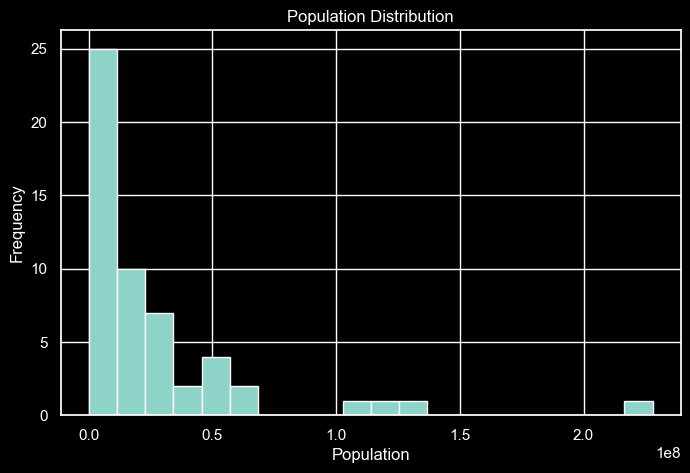

In [34]:
plt.style.use('dark_background')

df['population'].hist(bins=20, figsize=(8,5))
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()


In [35]:
plt.style.use('dark_background')


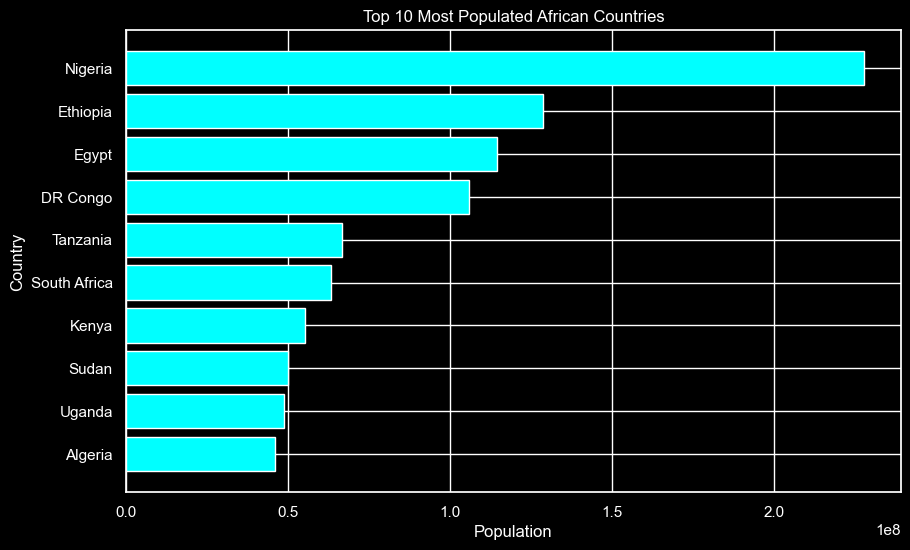

In [36]:
top10 = df.nlargest(10, 'population')

plt.figure(figsize=(10,6))
plt.barh(top10['country'], top10['population'], color='cyan')
plt.gca().invert_yaxis()
plt.title("Top 10 Most Populated African Countries")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()


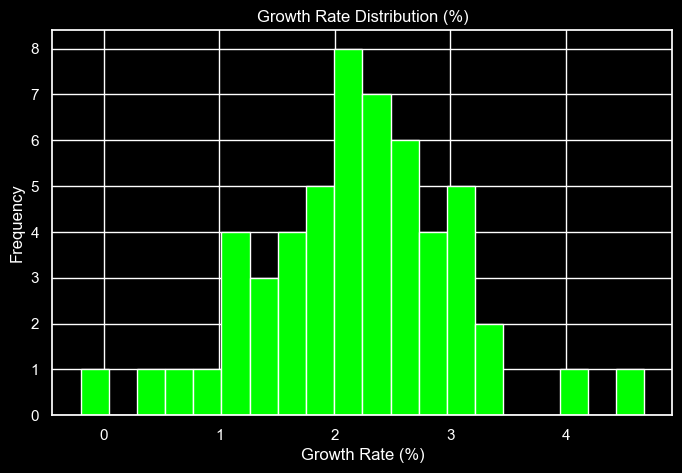

In [37]:
plt.figure(figsize=(8,5))
plt.hist(df['percentgrowth'], bins=20, color='lime')
plt.title("Growth Rate Distribution (%)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Frequency")
plt.show()


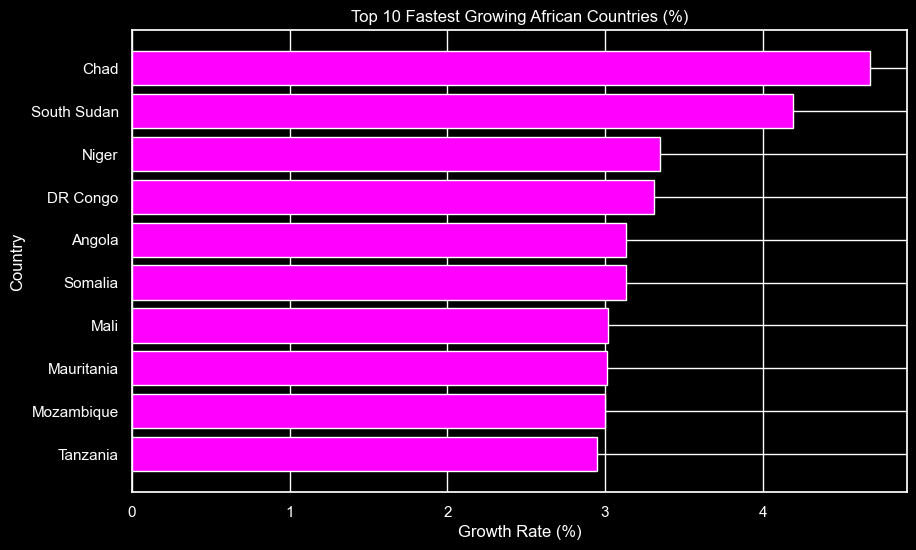

In [38]:
fastest = df.nlargest(10, 'percentgrowth')

plt.figure(figsize=(10,6))
plt.barh(fastest['country'], fastest['percentgrowth'], color='magenta')
plt.gca().invert_yaxis()
plt.title("Top 10 Fastest Growing African Countries (%)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Country")
plt.show()


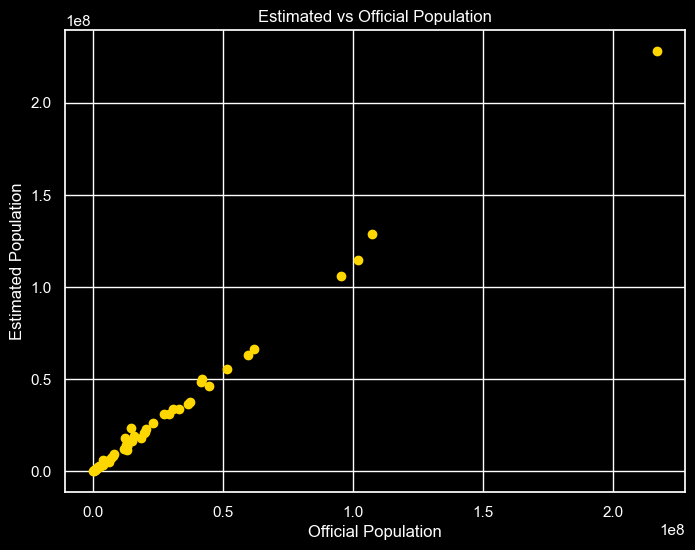

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(df['officialfigure'], df['population'], color='gold')
plt.title("Estimated vs Official Population")
plt.xlabel("Official Population")
plt.ylabel("Estimated Population")
plt.show()


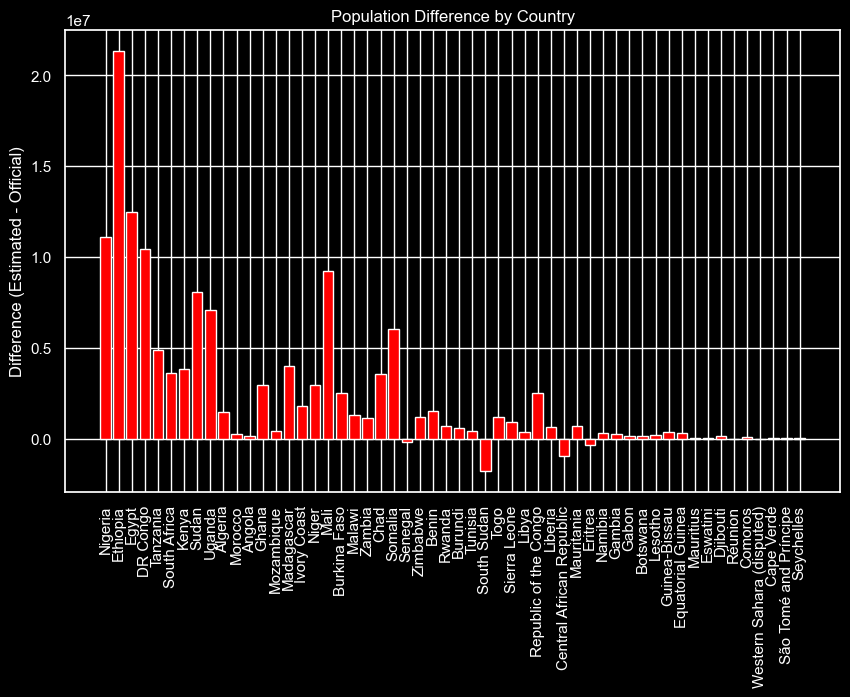

In [40]:
plt.figure(figsize=(10,6))
plt.bar(df['country'], df['population_difference'], color='red')
plt.xticks(rotation=90)
plt.title("Population Difference by Country")
plt.ylabel("Difference (Estimated - Official)")
plt.show()


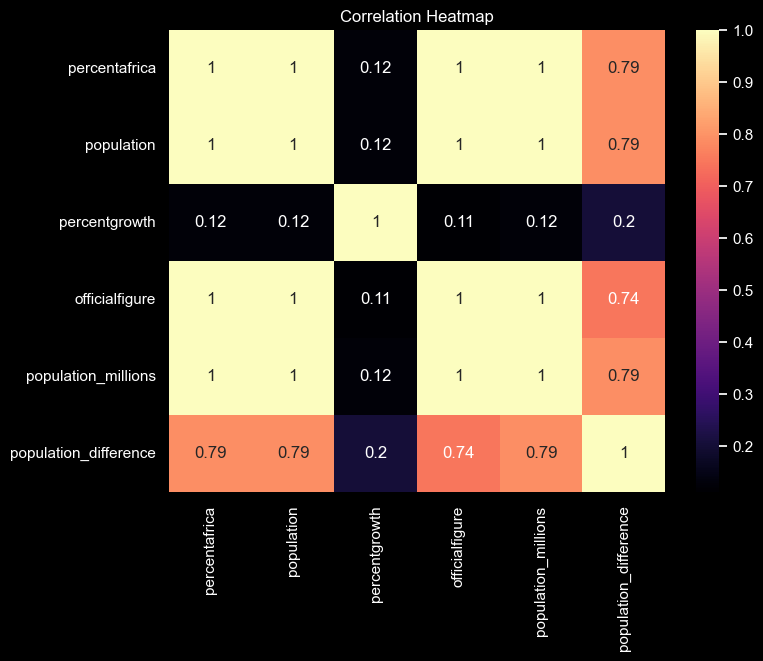

In [41]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma")
plt.title("Correlation Heatmap")
plt.show()


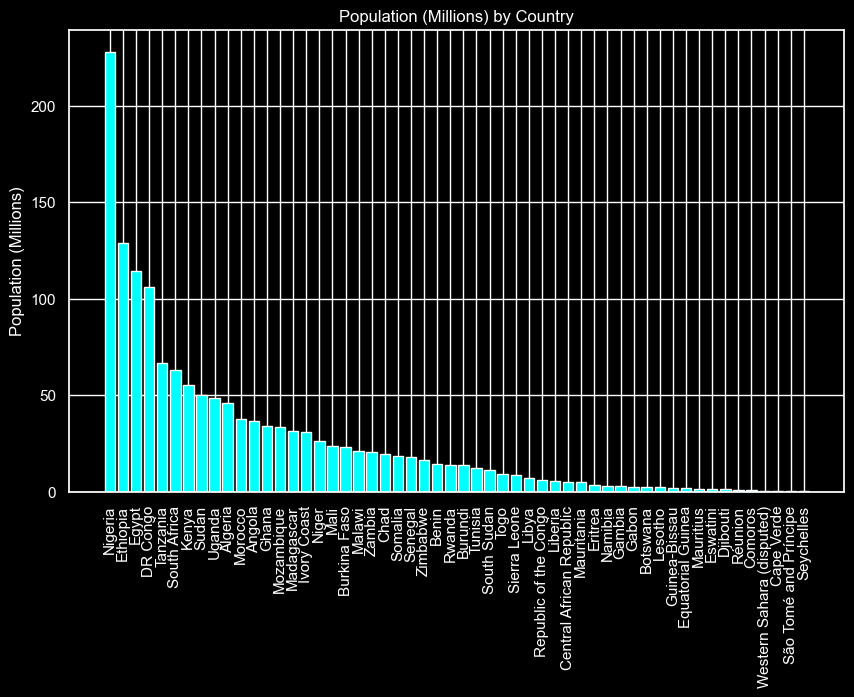

In [42]:
plt.figure(figsize=(10,6))
plt.bar(df['country'], df['population_millions'], color='cyan')
plt.xticks(rotation=90)
plt.title("Population (Millions) by Country")
plt.ylabel("Population (Millions)")
plt.show()


In [43]:
total_population = df['population'].sum()
total_population


np.int64(1437692357)

In [44]:
avg_growth = df['percentgrowth'].mean()
avg_growth


np.float64(2.1812632275132273)

In [45]:
total_diff = df['population_difference'].sum()
total_diff


np.int64(130022577)

In [46]:
df[df['percentgrowth'] > avg_growth][['country', 'percentgrowth']]


,country,percentgrowth
1,Ethiopia,2.640000
3,DR Congo,3.310000
4,Tanzania,2.950000
8,Uganda,2.840000
11,Angola,3.130000
13,Mozambique,3.000000
14,Madagascar,2.490000
15,Ivory Coast,2.540000
17,Niger,3.350000
18,Mali,3.020000


In [47]:
df['population_segment'] = pd.cut(
    df['population'],
    bins=[0, 5_000_000, 20_000_000, 50_000_000, 100_000_000, df['population'].max()],
    labels=['Very Small', 'Small', 'Medium', 'Large', 'Mega']
)


In [48]:
df['growth_segment'] = pd.cut(
    df['percentgrowth'],
    bins=[-5, 0, 1, 2, 3, df['percentgrowth'].max()],
    labels=['Declining', 'Stable', 'Slow Growth', 'Moderate Growth', 'High Growth']
)


In [49]:
df.groupby('population_segment')['percentgrowth'].mean()


C:\Users\eguen\AppData\Local\Temp\ipykernel_26220\861521323.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('population_segment')['percentgrowth'].mean()


population_segment
Very Small    1.706954
Small         2.425000
Medium        2.505385
Large         1.907500
Mega          2.442500
Name: percentgrowth, dtype: float64

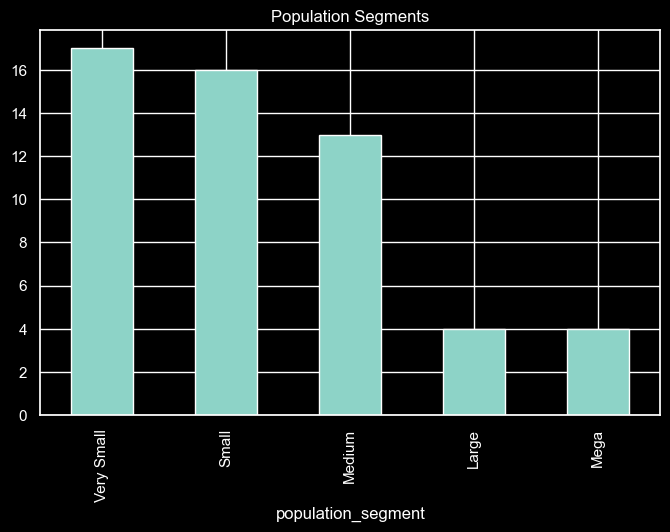

In [50]:
df['population_segment'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Population Segments")
plt.show()


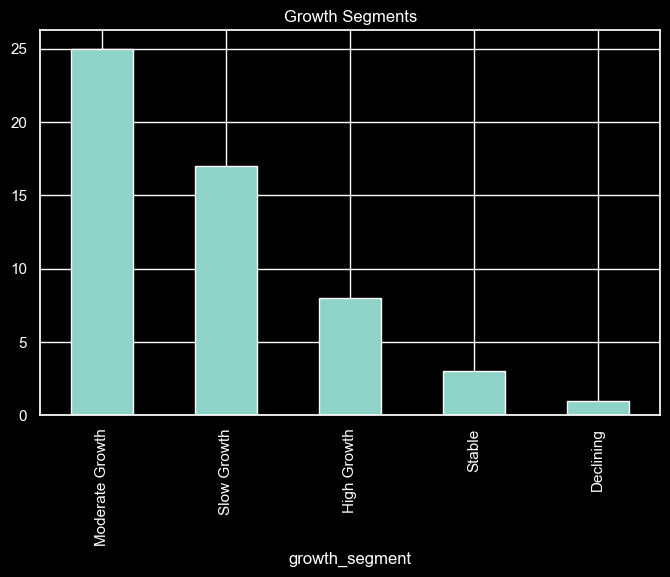

In [51]:
df['growth_segment'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Growth Segments")
plt.show()


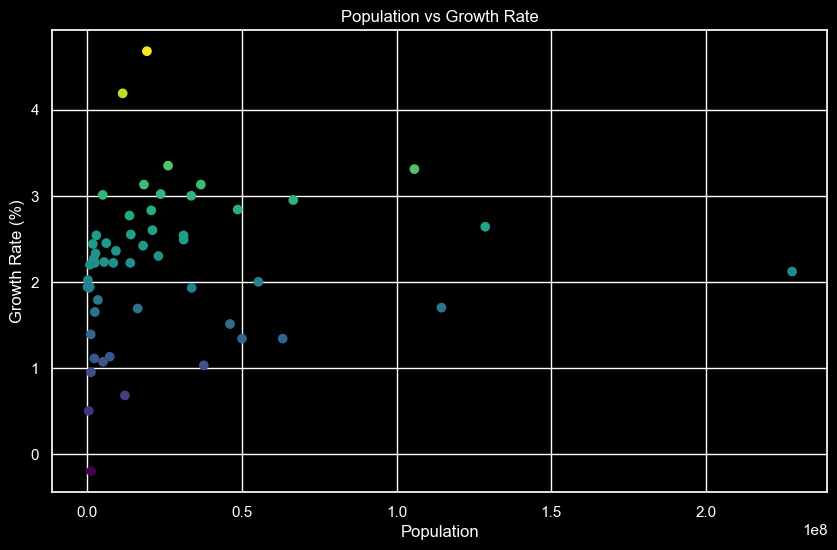

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(df['population'], df['percentgrowth'], c=df['percentgrowth'], cmap='viridis')
plt.title("Population vs Growth Rate")
plt.xlabel("Population")
plt.ylabel("Growth Rate (%)")
plt.show()


In [53]:
df.head()

,country,percentafrica,population,percentgrowth,officialfigure,officialdate,population_millions,population_difference,population_segment,growth_segment
0,Nigeria,15.4,227882945,2.12,216783400,2022-03-21,227.882945,11099545,Mega,Moderate Growth
1,Ethiopia,8.7,128691692,2.64,107334000,2023-07-01,128.691692,21357692,Mega,Moderate Growth
2,Egypt,7.7,114535772,1.70,102060688,2021-07-01,114.535772,12475084,Mega,Slow Growth
3,DR Congo,7.1,105789731,3.31,95370000,2019-07-01,105.789731,10419731,Mega,High Growth
4,Tanzania,4.5,66617606,2.95,61741120,2022-08-23,66.617606,4876486,Large,Moderate Growth


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 55
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                54 non-null     object        
 1   percentafrica          54 non-null     float64       
 2   population             54 non-null     int64         
 3   percentgrowth          54 non-null     float64       
 4   officialfigure         54 non-null     int64         
 5   officialdate           54 non-null     datetime64[ns]
 6   population_millions    54 non-null     float64       
 7   population_difference  54 non-null     int64         
 8   population_segment     54 non-null     category      
 9   growth_segment         54 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 4.3+ KB


In [55]:
df.describe(include='all')

,country,percentafrica,population,percentgrowth,officialfigure,officialdate,population_millions,population_difference,population_segment,growth_segment
count,54,54.000000,5.400000e+01,54.000000,5.400000e+01,54,54.000000,5.400000e+01,54,54
unique,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5
top,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Small,Moderate Growth
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,25
mean,NaN,1.811296,2.662393e+07,2.181263,2.421611e+07,2022-01-11 19:06:40,26.623933,2.407826e+06,NaN,NaN
min,NaN,0.010000,1.279510e+05,-0.200000,1.004470e+05,2012-07-01 00:00:00,0.127951,-1.766550e+06,NaN,NaN
25%,NaN,0.200000,2.538053e+06,1.692500,2.366192e+06,2021-01-15 18:00:00,2.538053,1.380738e+05,NaN,NaN
50%,NaN,0.950000,1.382196e+07,2.225000,1.285220e+07,2022-07-01 00:00:00,13.821960,6.595270e+05,NaN,NaN
75%,NaN,2.250000,3.302535e+07,2.630000,3.047130e+07,2023-07-01 00:00:00,33.025353,2.961874e+06,NaN,NaN
max,NaN,15.400000,2.278829e+08,4.680000,2.167834e+08,2024-09-19 00:00:00,227.882945,2.135769e+07,NaN,NaN


In [56]:
df.columns.tolist()

['country',
 'percentafrica',
 'population',
 'percentgrowth',
 'officialfigure',
 'officialdate',
 'population_millions',
 'population_difference',
 'population_segment',
 'growth_segment']

In [57]:
df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/africa_population_cleaned.csv", index=False)


In [58]:
df.head(30).to_csv(
    "C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/africa_population_first_30_rows.csv",
    index=False
)


In [59]:
import pandas as pd
df = pd.read_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/africa_population_cleaned.csv")
len(df.columns), df.columns.tolist()


(10,
 ['country',
  'percentafrica',
  'population',
  'percentgrowth',
  'officialfigure',
  'officialdate',
  'population_millions',
  'population_difference',
  'population_segment',
  'growth_segment'])

## Countries with Declining or Stagnant Growth
Filter and analyze countries with low or negative population growth rates (≤ 1%)

In [60]:
# Filter countries with growth rate <= 1% (Declining or Stable)
low_growth_countries = df[df['percentgrowth'] <= 1.0].sort_values('percentgrowth')
low_growth_countries[['country', 'percentgrowth', 'population', 'growth_segment']]

,country,percentgrowth,population,growth_segment
45,Mauritius,-0.20,1273588,Declining
51,Cape Verde,0.50,522331,Stable
28,Tunisia,0.68,12200431,Stable
46,Eswatini,0.95,1230506,Stable


In [61]:
# Summary statistics for low-growth countries
print(f"Number of countries with declining/stagnant growth: {len(low_growth_countries)}")
print(f"Average growth rate: {low_growth_countries['percentgrowth'].mean():.2f}%")
print(f"Total population: {low_growth_countries['population'].sum():,}")

Number of countries with declining/stagnant growth: 4
Average growth rate: 0.48%
Total population: 15,226,856


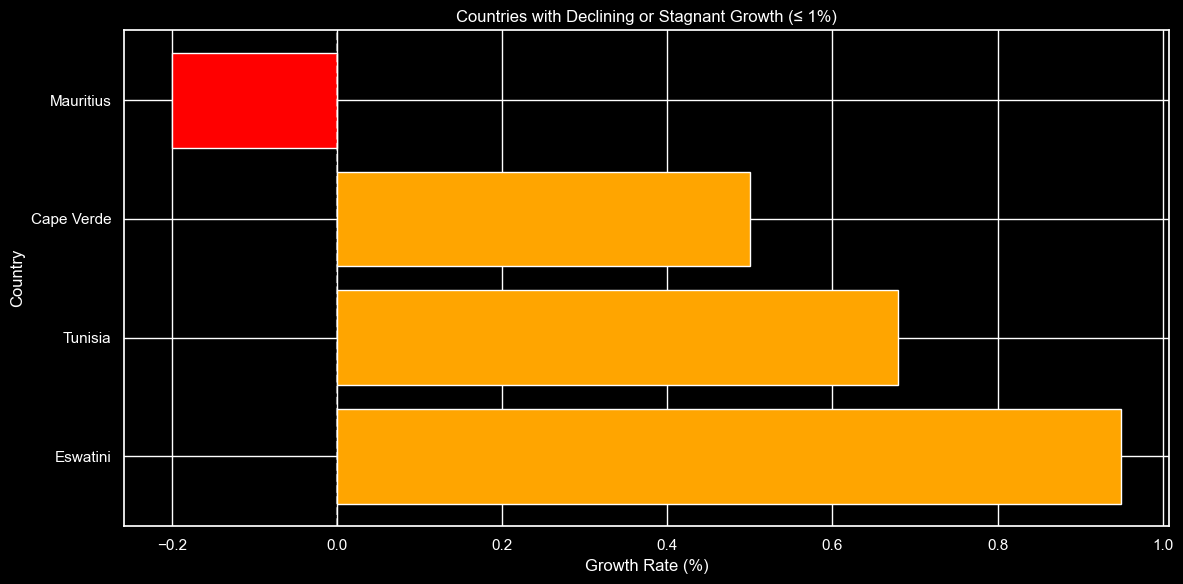

In [62]:
# Visualize low-growth countries
plt.figure(figsize=(12,6))
plt.barh(low_growth_countries['country'], low_growth_countries['percentgrowth'], 
         color=['red' if x < 0 else 'orange' for x in low_growth_countries['percentgrowth']])
plt.gca().invert_yaxis()
plt.title("Countries with Declining or Stagnant Growth (≤ 1%)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Country")
plt.axvline(x=0, color='white', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [63]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
print("\nCorrelation between numeric variables:")
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

=== CORRELATION ANALYSIS ===

Correlation between numeric variables:
                       percentafrica  population  percentgrowth  \
percentafrica               1.000000    0.999878       0.122964   
population                  0.999878    1.000000       0.123085   
percentgrowth               0.122964    0.123085       1.000000   
officialfigure              0.997351    0.997650       0.111058   
population_millions         0.999878    1.000000       0.123085   
population_difference       0.790271    0.788771       0.202400   

                       officialfigure  population_millions  \
percentafrica                0.997351             0.999878   
population                   0.997650             1.000000   
percentgrowth                0.111058             0.123085   
officialfigure               1.000000             0.997650   
population_millions          0.997650             1.000000   
population_difference        0.744806             0.788771   

                       pop

In [64]:
# Quartile analysis for population distribution
print("=== QUARTILE ANALYSIS ===")
print("\nPopulation quartiles:")
quartiles = df['population'].quantile([0.25, 0.5, 0.75])
print(f"Q1 (25%): {quartiles[0.25]:,.0f}")
print(f"Q2 (50% - Median): {quartiles[0.5]:,.0f}")
print(f"Q3 (75%): {quartiles[0.75]:,.0f}")
print(f"\nInterquartile Range (IQR): {quartiles[0.75] - quartiles[0.25]:,.0f}")

=== QUARTILE ANALYSIS ===

Population quartiles:
Q1 (25%): 2,538,053
Q2 (50% - Median): 13,821,960
Q3 (75%): 33,025,353

Interquartile Range (IQR): 30,487,300


In [65]:
# Standard deviation and variance analysis
print("=== VARIABILITY METRICS ===")
print(f"\nPopulation standard deviation: {df['population'].std():,.0f}")
print(f"Population variance: {df['population'].var():,.0f}")
print(f"Population coefficient of variation: {(df['population'].std() / df['population'].mean()) * 100:.2f}%")
print(f"\nGrowth rate standard deviation: {df['percentgrowth'].std():.2f}%")
print(f"Growth rate variance: {df['percentgrowth'].var():.2f}")

=== VARIABILITY METRICS ===

Population standard deviation: 40,100,560
Population variance: 1,608,054,945,056,864
Population coefficient of variation: 150.62%

Growth rate standard deviation: 0.87%
Growth rate variance: 0.76


In [66]:
# Skewness and kurtosis (distribution shape)
from scipy import stats

print("=== DISTRIBUTION SHAPE ===")
print(f"\nPopulation skewness: {stats.skew(df['population']):.2f}")
print(f"Population kurtosis: {stats.kurtosis(df['population']):.2f}")
print(f"\nGrowth rate skewness: {stats.skew(df['percentgrowth']):.2f}")
print(f"Growth rate kurtosis: {stats.kurtosis(df['percentgrowth']):.2f}")
print("\nInterpretation:")
print("- Skewness > 0: Right-skewed (tail on right)")
print("- Skewness < 0: Left-skewed (tail on left)")
print("- Kurtosis > 0: Heavy-tailed (more outliers)")
print("- Kurtosis < 0: Light-tailed (fewer outliers)")

=== DISTRIBUTION SHAPE ===

Population skewness: 3.02
Population kurtosis: 10.84

Growth rate skewness: 0.01
Growth rate kurtosis: 0.88

Interpretation:
- Skewness > 0: Right-skewed (tail on right)
- Skewness < 0: Left-skewed (tail on left)
- Kurtosis > 0: Heavy-tailed (more outliers)
- Kurtosis < 0: Light-tailed (fewer outliers)


In [67]:
# Regional concentration analysis
print("=== POPULATION CONCENTRATION ===")
total_pop = df['population'].sum()
df_sorted = df.sort_values('population', ascending=False)

# Top 5 countries by population share
print("\nTop 5 countries by population share:")
for i in range(min(5, len(df_sorted))):
    country = df_sorted.iloc[i]['country']
    pop = df_sorted.iloc[i]['population']
    share = (pop / total_pop) * 100
    print(f"{i+1}. {country}: {pop:,.0f} ({share:.1f}%)")

# Calculate how many countries account for 50% and 80% of population
cumulative_pct = (df_sorted['population'].cumsum() / total_pop) * 100
countries_50pct = (cumulative_pct <= 50).sum()
countries_80pct = (cumulative_pct <= 80).sum()
print(f"\nPopulation concentration:")
print(f"- Top {countries_50pct} countries contain 50% of total population")
print(f"- Top {countries_80pct} countries contain 80% of total population")

=== POPULATION CONCENTRATION ===

Top 5 countries by population share:
1. Nigeria: 227,882,945 (15.9%)
2. Ethiopia: 128,691,692 (9.0%)
3. Egypt: 114,535,772 (8.0%)
4. DR Congo: 105,789,731 (7.4%)
5. Tanzania: 66,617,606 (4.6%)

Population concentration:
- Top 6 countries contain 50% of total population
- Top 17 countries contain 80% of total population


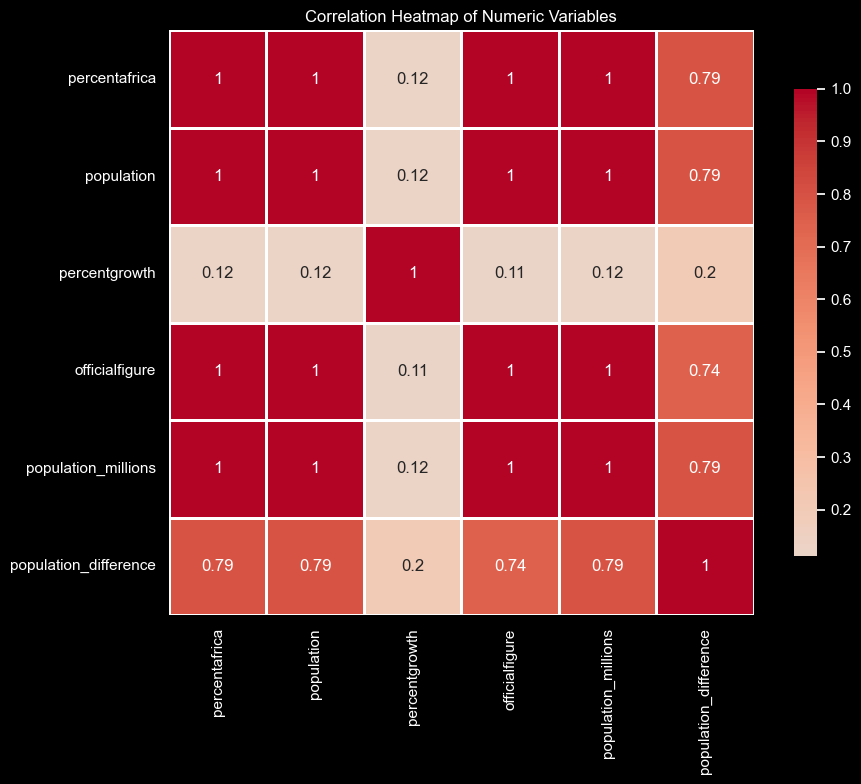

In [68]:
# Heatmap of correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

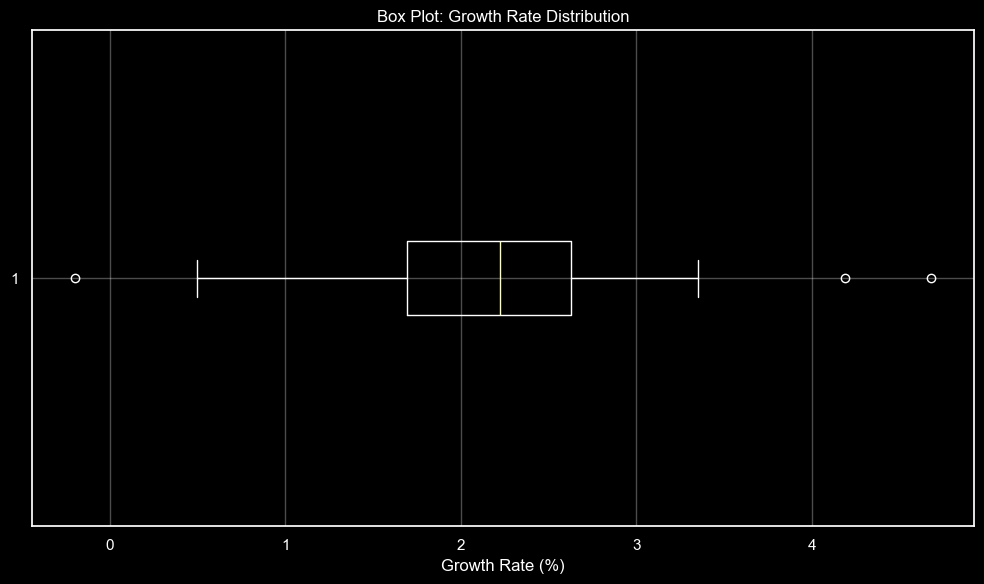

In [69]:
# Box plot for growth rate distribution
plt.figure(figsize=(10,6))
plt.boxplot(df['percentgrowth'], vert=False)
plt.xlabel('Growth Rate (%)')
plt.title('Box Plot: Growth Rate Distribution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()